# Titanic Survival Prediction Project

Welcome to the Titanic Survival Prediction project! In this notebook, we will explore the Titanic dataset and build a machine learning model to predict passenger survival.

## Project Workflow

1. **Introduction & Problem Statement**  
    Understand the objective and the dataset.

2. **Data Exploration**  
    Analyze and visualize the data to gain insights.

3. **Data Preprocessing**  
    Clean and prepare the data for modeling.

4. **Feature Engineering**  
    Create new features to improve model performance.

5. **Model Building**  
    Train and evaluate different machine learning models.

6. **Model Evaluation**  
    Assess model performance using appropriate metrics.

7. **Conclusion**  
    Summarize findings and next steps.

---

Let's get started!

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\kaggle\titanic\1\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.isnull().sum())

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop(columns=['Cabin', 'Ticket','Name','PassengerId'], axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_1500\1569971147.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1500\1569971147.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [4]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df['Embarked'] = le.fit_transform(df['Embarked'])

In [5]:
x = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[92 13]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Text(0.5, 0, 'Importance')

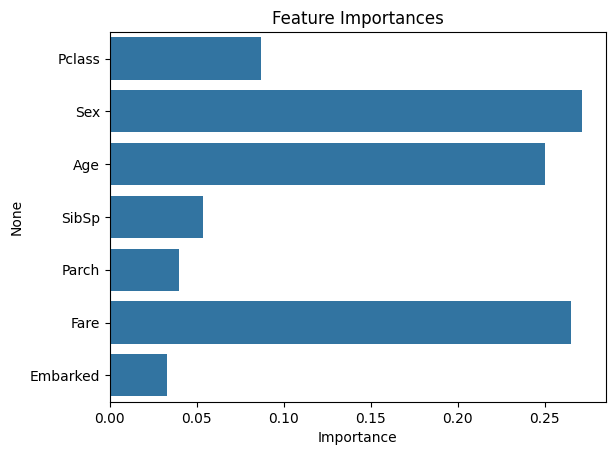

In [8]:
importances = model.feature_importances_
feature_names = x.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')

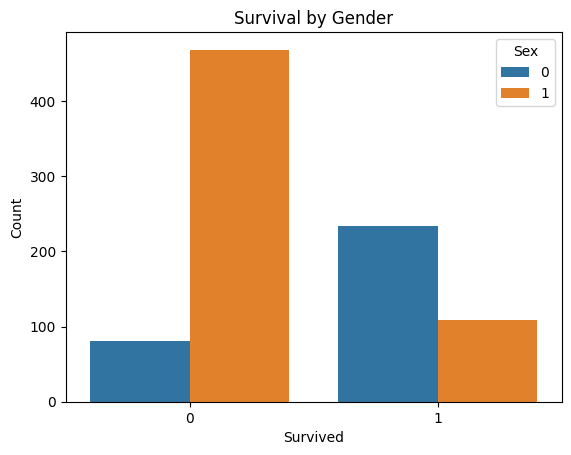

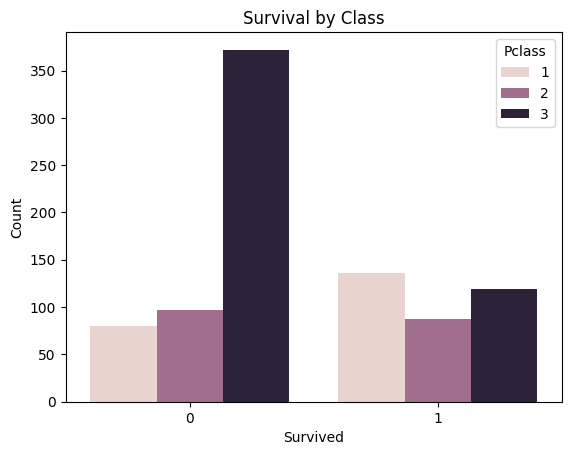

In [9]:
# Survival by Gender
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Survival by Class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')
plt.xlabel('Survived')  
plt.ylabel('Count')
plt.show()